In [1]:
import os
import sys
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import seaborn as sns

In [2]:
# add the 'code' folder into sys.path to use helper functions

sys.path.insert(1, 'C:/Users/Tomer Mizrahi/Desktop/DsHitTomer/code')

from data_process import extract_data_related

# working directory
root_dir = 'C:/Users/Tomer Mizrahi/Desktop/DsHitTomer'

In [3]:
df_survey = pd.read_csv(os.path.join(root_dir, 'data/developer_survey_2021/survey_results_public.csv'))

df_survey.shape

(64461, 61)

In [4]:
# how many missing DevType

df_survey['DevType'].isnull().sum()

15091

In [5]:
from collections import defaultdict

# get the counts of different developer types

df_DevType = df_survey['DevType'].value_counts().to_frame().reset_index().rename(columns={'DevType':'count', 'index': 'DevType'})

In [6]:
# replace ',' by '_' so we can split the string of DevType into a list later

df_DevType['DevType_list'] = df_DevType['DevType'].str.replace(', ', '_').str.split(';')

df_DevType['DevType_list'] = df_DevType['DevType_list'].apply(lambda x: set(x))  # convert list to dictionary for efficiency

df_DevType

,DevType,count,DevType_list
0,"Developer, full-stack",4424,{Developer_full-stack}
1,"Developer, back-end",3086,{Developer_back-end}
2,"Developer, back-end;Developer, front-end;Devel...",2227,"{Developer_front-end, Developer_back-end, Deve..."
3,"Developer, back-end;Developer, full-stack",1476,"{Developer_back-end, Developer_full-stack}"
4,"Developer, front-end",1401,{Developer_front-end}
...,...,...,...
8264,Data scientist or machine learning specialist;...,1,{Data scientist or machine learning specialist...
8265,Academic researcher;Database administrator;Des...,1,"{Engineer_data, Designer, Developer_QA or test..."
8266,"Database administrator;Developer, front-end;De...",1,"{Engineer_data, Developer_QA or test, Develope..."
8267,"Developer, back-end;Developer, front-end;Devel...",1,"{System administrator, Educator, Developer_fro..."


In [7]:
df_DevType['data_related'] = df_DevType['DevType'].\
    str.contains('data(?![a-z])', case=False, regex=True)

df_DevType_data = df_DevType[df_DevType['data_related']==True].copy()

df_DevType_data.shape

(3889, 4)

In [8]:
df_DevType_data.head(5)

,DevType,count,DevType_list,data_related
13,Data scientist or machine learning specialist,369,{Data scientist or machine learning specialist},True
18,Data or business analyst,285,{Data or business analyst},True
24,"Developer, back-end;Engineer, data",227,"{Engineer_data, Developer_back-end}",True
30,"Engineer, data",189,{Engineer_data},True
32,Data or business analyst;Data scientist or mac...,186,"{Data or business analyst, Data scientist or m...",True


In [9]:
print(f"Percentage of data-related roles from survey: {sum(df_DevType_data['count']) / len(df_survey)*100: 5.2f}%")

Percentage of data-related roles from survey:  13.54%


In [10]:
sum(df_DevType_data['count'])

8726

In [11]:
data_role_count = defaultdict(int)

for idx, row in df_DevType_data.iterrows():
    for role in row['DevType_list']:
        data_role_count[role] = data_role_count[role] + row['count']

In [12]:
data_role_count

defaultdict(int,
            {'Data scientist or machine learning specialist': 3988,
             'Data or business analyst': 4024,
             'Engineer_data': 3738,
             'Developer_back-end': 4843,
             'Scientist': 1140,
             'Academic researcher': 1585,
             'Developer_full-stack': 3814,
             'Designer': 1344,
             'Senior executive/VP': 446,
             'Developer_desktop or enterprise applications': 2184,
             'Developer_QA or test': 987,
             'Developer_game or graphics': 563,
             'System administrator': 1504,
             'Engineer_site reliability': 631,
             'DevOps specialist': 1359,
             'Educator': 891,
             'Developer_mobile': 1339,
             'Product manager': 876,
             'Marketing or sales professional': 295,
             'Engineering manager': 771,
             'Developer_embedded applications or devices': 1024,
             'Developer_front-end': 2578,
        

Text(0.5, 1.0, 'data-related roles count')

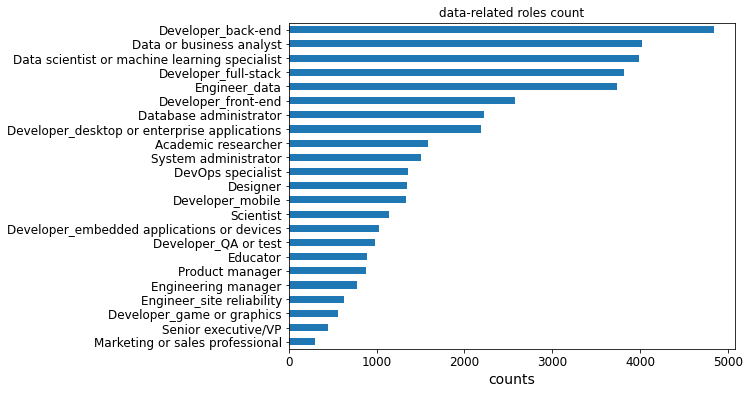

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
pd.Series(data_role_count).sort_values().plot.barh(ax=ax)

ax.set_xlabel('counts')
ax.set_title('data-related roles count')

Text(0.5, 1.0, 'data roles (DS, DA, DE) count')

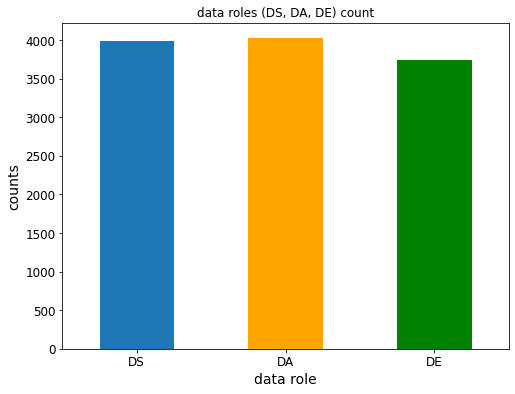

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

data_role_count_1 = {'DS': 3988, 'DA': 4024, 'DE': 3738}

pd.Series(data_role_count_1).plot(kind='bar', color=['C0', 'orange', 'green'], ax=ax, rot=0)

ax.set_xlabel('data role') 
# ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel('counts')
ax.set_title('data roles (DS, DA, DE) count')

In [15]:
DS_multiple_roles = defaultdict(int)
DA_multiple_roles = defaultdict(int)
DE_multiple_roles = defaultdict(int)

DS_counts, DA_counts, DE_counts = 0, 0, 0
DS_only_counts, DA_only_counts, DE_only_counts = 0, 0, 0

for idx, row in df_DevType_data.iterrows(): 
            
    if 'Data scientist or machine learning specialist' in row['DevType_list']:
        DS_counts += row['count']
        if len(row['DevType_list']) == 1:
            DS_only_counts += row['count']
        for role in row['DevType_list']:
            DS_multiple_roles[role] = DS_multiple_roles[role] + row['count']
    
    if 'Data or business analyst' in row['DevType_list']:
        DA_counts += row['count']
        if len(row['DevType_list']) == 1:
            DA_only_counts += row['count']
        for role in row['DevType_list']:
            DA_multiple_roles[role] = DA_multiple_roles[role] + row['count']
            
    if 'Engineer_data' in row['DevType_list']:
        DE_counts += row['count']
        if len(row['DevType_list']) == 1:
            DE_only_counts += row['count']
        for role in row['DevType_list']:
            DE_multiple_roles[role] = DE_multiple_roles[role] + row['count']



In [16]:
index = ['DS', 'DA', 'DE']
total_count = [DS_counts, DA_counts, DE_counts]
only_count = [DS_only_counts, DA_only_counts, DE_only_counts]

df_counts = pd.DataFrame({'total_count': total_count, 'only_count': only_count}, index=index)

In [17]:
df_counts

,total_count,only_count
DS,3988,369
DA,4024,285
DE,3738,189


In [18]:
# how often the data role has the other developer duty
1 - df_counts['only_count'] / df_counts['total_count']

DS    0.907472
DA    0.929175
DE    0.949438
dtype: float64

<AxesSubplot:>

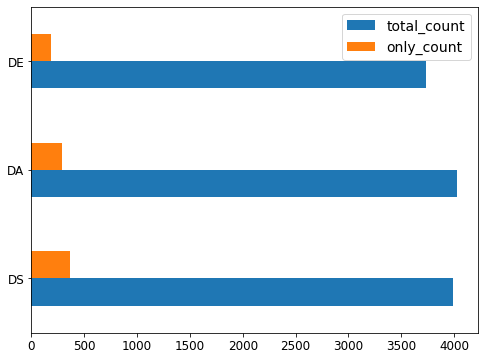

In [19]:
# for these three types of data jobs, how many responders only have one job duty and how many have multiple job duty

fig, ax = plt.subplots(figsize=(8, 6))

df_counts.plot.barh(ax=ax)

<AxesSubplot:title={'center':'Roles Associated with Data Scientist'}>

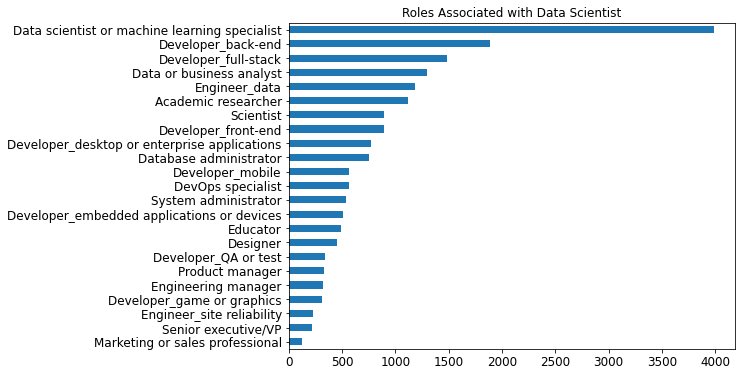

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

pd.Series(DS_multiple_roles).sort_values(ascending=True).plot.barh(ax=ax, 
                                                                   title='Roles Associated with Data Scientist')

<AxesSubplot:title={'center':'Roles Associated with Data Analyst'}>

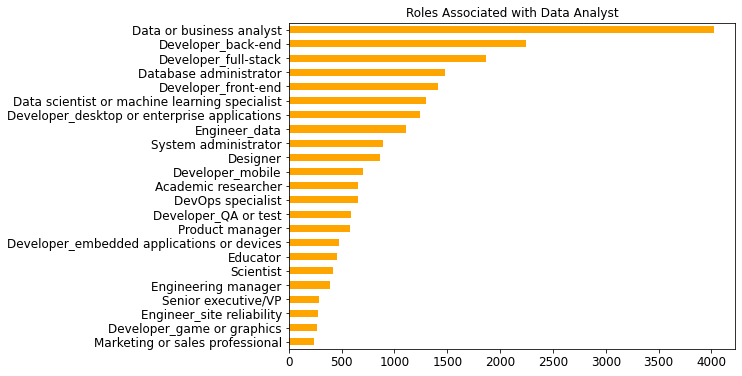

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

pd.Series(DA_multiple_roles).sort_values(ascending=True).plot.barh(ax=ax, 
                                                                   title='Roles Associated with Data Analyst', color='orange')

<AxesSubplot:title={'center':'Roles Associated with Data Engineer'}>

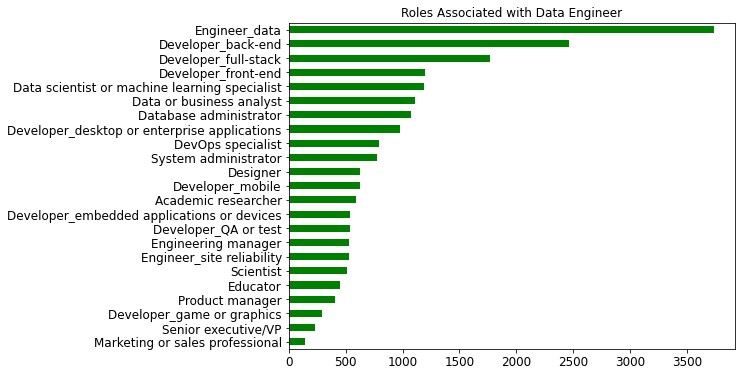

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

pd.Series(DE_multiple_roles).sort_values(ascending=True).plot.barh(ax=ax, 
                                                                   title='Roles Associated with Data Engineer', color='green')

In [23]:
df_survey['data_related'] = df_survey['DevType'].\
    str.contains('data(?![a-z])', case=False, regex=True)

df_data = df_survey[df_survey['data_related']==True].copy()

In [24]:
df_data.shape

(8726, 62)

In [25]:
df_survey.shape

(64461, 62)

In [26]:
df_survey.shape

(64461, 62)

In [27]:
df_data['DevType']

21                    Developer, full-stack;Engineer, data
24       Developer, back-end;Developer, full-stack;DevO...
29       Data or business analyst;Database administrato...
35       Data or business analyst;Data scientist or mac...
43       Data or business analyst;Developer, back-end;P...
                               ...                        
64432    Data scientist or machine learning specialist;...
64437                             Data or business analyst
64446    Academic researcher;Data or business analyst;D...
64451        Data scientist or machine learning specialist
64453    Data or business analyst;Developer, mobile;Sen...
Name: DevType, Length: 8726, dtype: object

In [28]:
# focus on the actitely employed prarticipants only
valid_employed = ['Employed full-time', 'Employed part-time',
                  'Independent contractor, freelancer, or self-employed']
valid_employed_cond = df_survey['Employment'].isin(valid_employed)

sum(valid_employed_cond)

53159

In [29]:
data_related_cond = df_survey['data_related']==True

In [30]:
sum(data_related_cond)

8726

In [31]:
# focus on currently actively employed only
print(f"Total number of responders who are actively employed: {sum(valid_employed_cond)}\n"
      f"Percentage of responders who process a data-related role: "
      f"{sum(valid_employed_cond & data_related_cond) / sum(valid_employed_cond)*100: 5.2f}%")

Total number of responders who are actively employed: 53159
Percentage of responders who process a data-related role:  15.69%


In [32]:
df_data = extract_data_related(df_survey)

In [33]:
df_data.shape

(11186, 65)

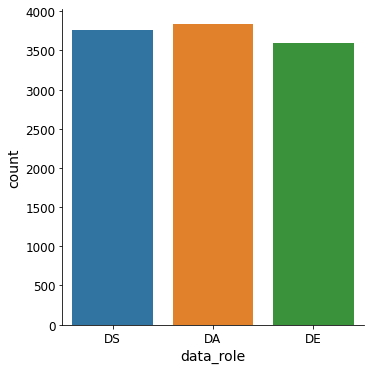

In [34]:
# number of DS/DA/DE
sns.catplot(x="data_role", kind='count', data=df_data)

In [35]:
df_data["data_role"].value_counts()

DA    3832
DS    3761
DE    3593
Name: data_role, dtype: int64

Text(0.5, 1.0, 'Numbers of Data Jobs')

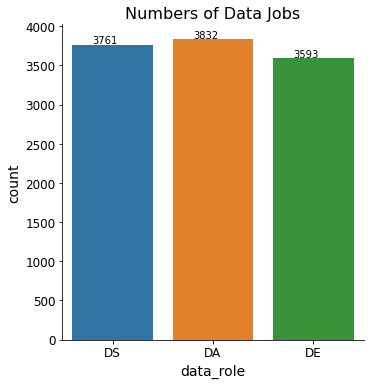

In [36]:
# number of DS/DA/DE
g = sns.catplot(x="data_role", kind='count', data=df_data)
values = [3761, 3832, 3593]

for p, v in zip(g.axes.flat[0].patches, values):
    g.axes.flat[0].annotate(f"{v}", (p.get_x() * 1.0 + 0.2, p.get_height() * 1.005))

g.axes.flat[0].set_title("Numbers of Data Jobs", fontsize=16)

In [37]:
df_data['data_role'].value_counts()

DA    3832
DS    3761
DE    3593
Name: data_role, dtype: int64

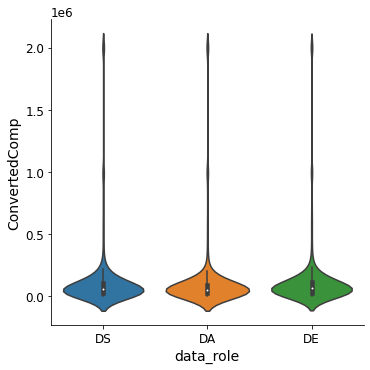

In [38]:

# distribution of salary for different data roles, violin plot
sns.catplot(x='data_role', y="ConvertedComp", kind="violin", data=df_data)

Text(0.5, 1.0, 'Salaries of Data Jobs')

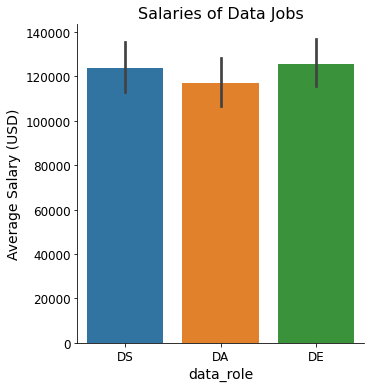

In [39]:
# distribution of salary for different data roles, bar plot

g = sns.catplot(x='data_role', y="ConvertedComp", kind='bar', data=df_data)

g.set(ylabel='Average Salary (USD)')
g.axes.flat[0].set_title("Salaries of Data Jobs", fontsize=16)

In [40]:
# get countries with top 9 counts
df_data['Country'].value_counts().iloc[:9]

United States     2757
India             1160
Germany            664
United Kingdom     653
Brazil             346
Canada             341
France             320
Australia          258
Netherlands        243
Name: Country, dtype: int64

Text(0.5, 0.98, 'Salaries of Data Jobs in Different Countries')

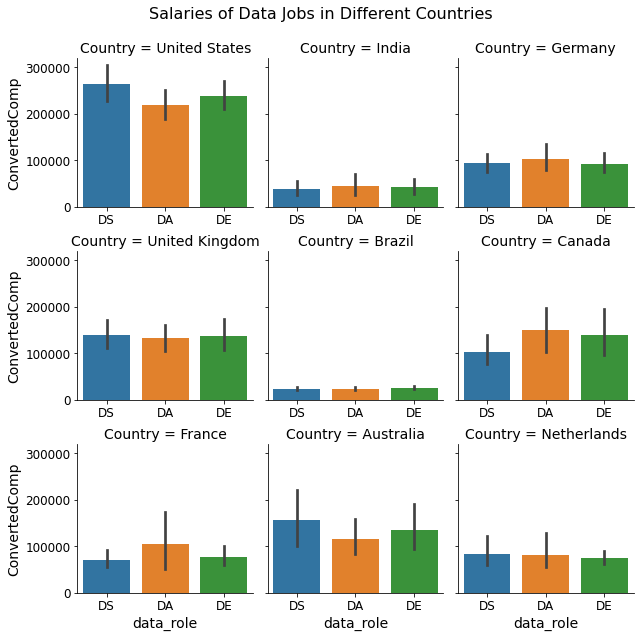

In [41]:
top_ten_countries = ['United States', 'India', 'Germany', 'United Kingdom', 'Brazil', 
                     'Canada', 'France', 'Australia', 'Netherlands']

g = sns.FacetGrid(df_data[df_data['Country'].isin(top_ten_countries)], 
                  col='Country', hue='data_role',
                  col_wrap=3, col_order=top_ten_countries, sharex=False)
g.map(sns.barplot, 'data_role', "ConvertedComp", order=["DS", "DA", "DE"])

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries of Data Jobs in Different Countries')

In [42]:
df_data['Gender'].value_counts()

Man                                                            8732
Woman                                                           716
Non-binary, genderqueer, or gender non-conforming                65
Man;Non-binary, genderqueer, or gender non-conforming            35
Woman;Non-binary, genderqueer, or gender non-conforming          26
Woman;Man;Non-binary, genderqueer, or gender non-conforming      20
Woman;Man                                                        18
Name: Gender, dtype: int64

In [43]:
df_data['Gender_1'] = df_data['Gender'].apply(
    lambda x: x if pd.isna(x) or x == 'Man' or x == 'Woman' else 'others')

df_data['Gender_1'].value_counts()

Man       8732
Woman      716
others     164
Name: Gender_1, dtype: int64

Text(0.5, 1.0, 'Gender Distribution in Data Jobs')

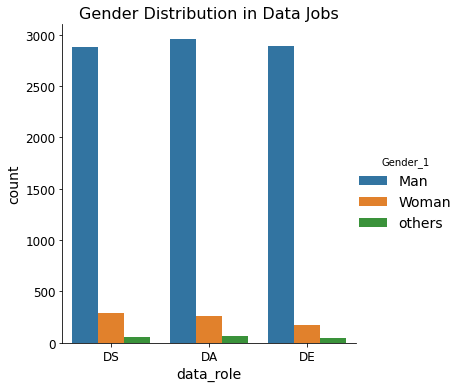

In [44]:
gender_types = ['Man', 'Woman', 'others']

g = sns.catplot(x='data_role', kind='count', hue='Gender_1', 
            data=df_data)

g.axes.flat[0].set_title("Gender Distribution in Data Jobs", fontsize=16)

Text(0.5, 1.0, 'Salaries in Data Jobs by Genders')

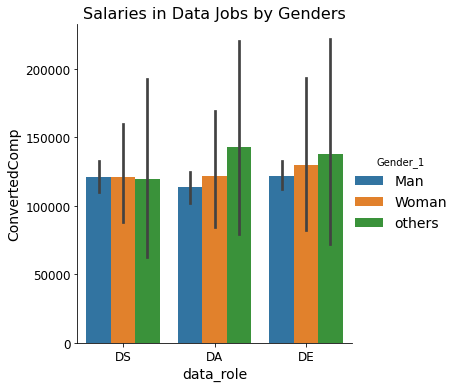

In [45]:
gender_types = ['Man', 'Woman', 'others']

g = sns.catplot(x='data_role', y='ConvertedComp', kind='bar', hue='Gender_1', 
            data=df_data)

g.axes.flat[0].set_title("Salaries in Data Jobs by Genders", fontsize=16)

Text(0.5, 1.0, 'Salaries in Data Jobs by Genders')

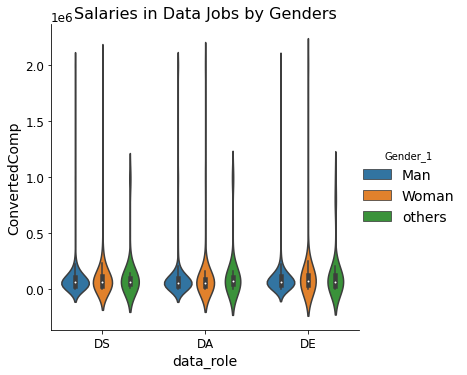

In [46]:
g = sns.catplot(x='data_role', y="ConvertedComp", kind="violin", hue='Gender_1', data=df_data)

g.axes.flat[0].set_title("Salaries in Data Jobs by Genders", fontsize=16)

In [47]:
df_data['YearsCodePro'] = pd.to_numeric(df_data['YearsCodePro'].str.\
                replace('Less than 1 year', '0').\
                str.replace('More than 50 years', '51'), downcast='integer')

In [48]:
df_data['YearsCodePro'].quantile(q=[0.25, 0.5, 0.75])

0.25     3.0
0.50     6.0
0.75    13.0
Name: YearsCodePro, dtype: float64

In [49]:
df_data['YearsCodePro'].min()

0.0

In [50]:
# divide "YearsCodePro" into 4 bins

df_data['YearsCodeProBin'] = pd.qcut(df_data['YearsCodePro'], 4, labels=['0-3 years', '3-6 years', '6-13 years', '13+years'])

In [51]:
df_data['YearsCodeProBin'].value_counts()

0-3 years     3302
6-13 years    2520
13+years      2459
3-6 years     2311
Name: YearsCodeProBin, dtype: int64

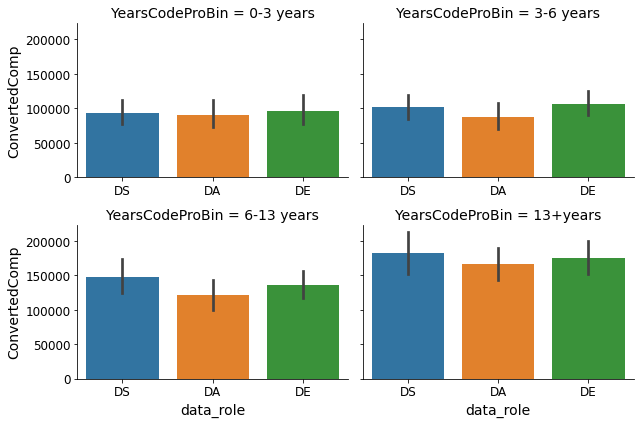

In [52]:
g = sns.FacetGrid(df_data, 
                  col='YearsCodeProBin', hue='data_role',
                  col_wrap=2, col_order=['0-3 years', '3-6 years', '6-13 years', '13+years'], aspect=1.5, sharex=False)

g.map(sns.barplot, 'data_role', "ConvertedComp", order=["DS", "DA", "DE"])

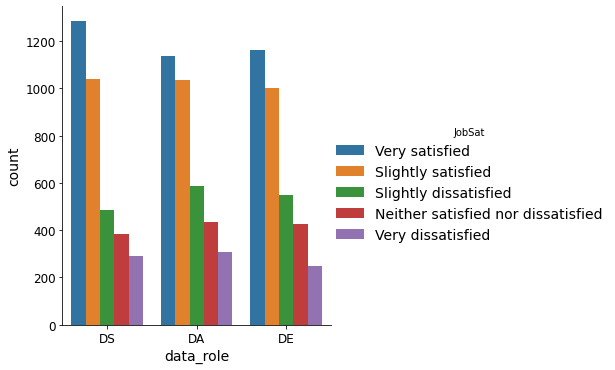

In [53]:
sns.catplot(x='data_role', kind='count', hue='JobSat', 
            data=df_data, hue_order=['Very satisfied', 'Slightly satisfied', 
                                      'Slightly dissatisfied', 
                                      'Neither satisfied nor dissatisfied', 
                                      'Very dissatisfied'])

Text(0.5, 1.0, 'Salaries v.s. Job Satisfaction\n by Jobs')

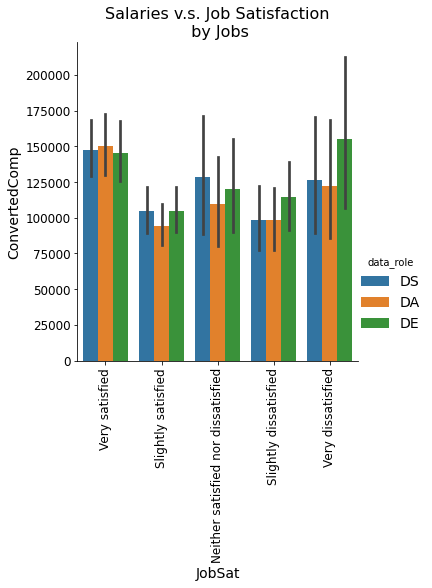

In [54]:
ax = sns.catplot(x='JobSat', y="ConvertedComp", hue='data_role',
                 kind='bar', 
                 data=df_data, 
                 order=['Very satisfied', 'Slightly satisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly dissatisfied',
                        'Very dissatisfied'])

ax.set_xticklabels(rotation=90)

ax.axes.flat[0].set_title("Salaries v.s. Job Satisfaction\n by Jobs", fontsize=16)

Text(0.5, 1.0, 'Salary v.s. Job Satisfaction')

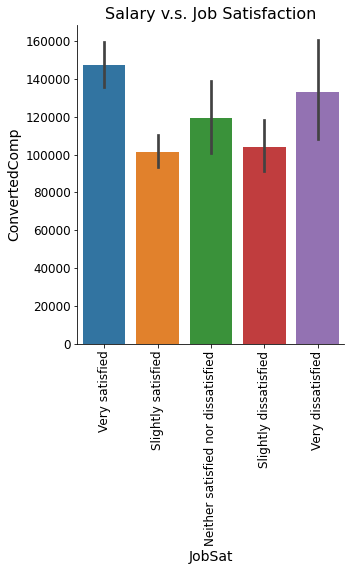

In [55]:
ax = sns.catplot(x='JobSat', y="ConvertedComp", 
                 kind='bar', 
                 data=df_data, 
                 order=['Very satisfied', 'Slightly satisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly dissatisfied',
                        'Very dissatisfied'])

ax.set_xticklabels(rotation=90)
ax.axes.flat[0].set_title("Salary v.s. Job Satisfaction", fontsize=16)

In [56]:
_ = {'Just me - I am a freelancer, sole proprietor, etc.': 1,
               '2 to 9 employees': 2,
               '10 to 19 employees': 3,
               '20 to 99 employees': 4,
               '100 to 499 employees': 5,
               '500 to 999 employees': 6,
               '1,000 to 4,999 employees': 7,
               '5,000 to 9,999 employees': 8,
               '10,000 or more employees': 9,}

[tmp for tmp in _.keys()][-1::-1]

['10,000 or more employees',
 '5,000 to 9,999 employees',
 '1,000 to 4,999 employees',
 '500 to 999 employees',
 '100 to 499 employees',
 '20 to 99 employees',
 '10 to 19 employees',
 '2 to 9 employees',
 'Just me - I am a freelancer, sole proprietor, etc.']

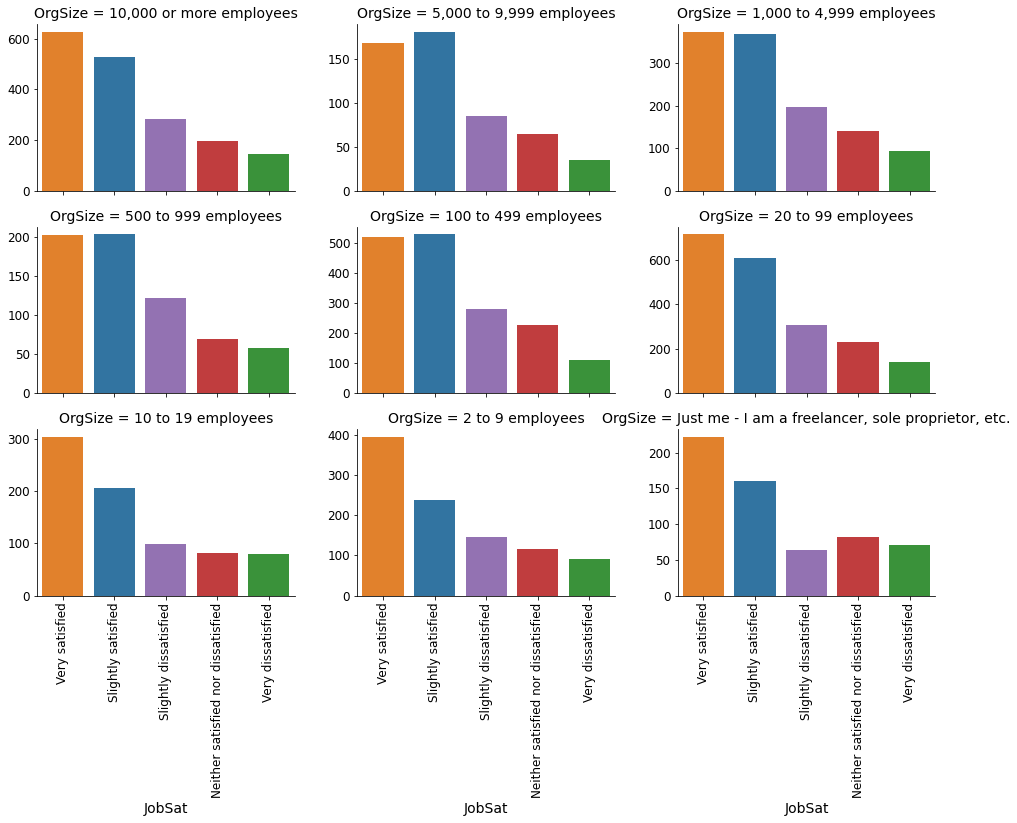

In [57]:
g = sns.FacetGrid(df_data,
                  col='OrgSize',
                  hue='JobSat',
                  col_wrap=3, 
                  col_order=['10,000 or more employees',
                             '5,000 to 9,999 employees',
                             '1,000 to 4,999 employees',
                             '500 to 999 employees',
                             '100 to 499 employees',
                             '20 to 99 employees',
                             '10 to 19 employees',
                             '2 to 9 employees',
                             'Just me - I am a freelancer, sole proprietor, etc.'],
                  sharex=True, sharey=False, aspect=1.5)

g.map(sns.countplot, 'JobSat', order=['Very satisfied', 'Slightly satisfied', 
                                      'Slightly dissatisfied', 
                                      'Neither satisfied nor dissatisfied', 
                                      'Very dissatisfied'])

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [58]:
_ = {'Never': 0,
 'Rarely: 1-2 days per year or less': 1,
                   'Occasionally: 1-2 days per quarter but less than monthly': 2,
                   'Sometimes: 1-2 days per month but less than weekly': 3,
                   'Often: 1-2 days per week or more': 4}

[tmp for tmp in _.keys()]

['Never',
 'Rarely: 1-2 days per year or less',
 'Occasionally: 1-2 days per quarter but less than monthly',
 'Sometimes: 1-2 days per month but less than weekly',
 'Often: 1-2 days per week or more']

Text(0.5, 1.0, 'NEWOvertime = Occasionally: 1-2 days per quarter \n but less than monthly')

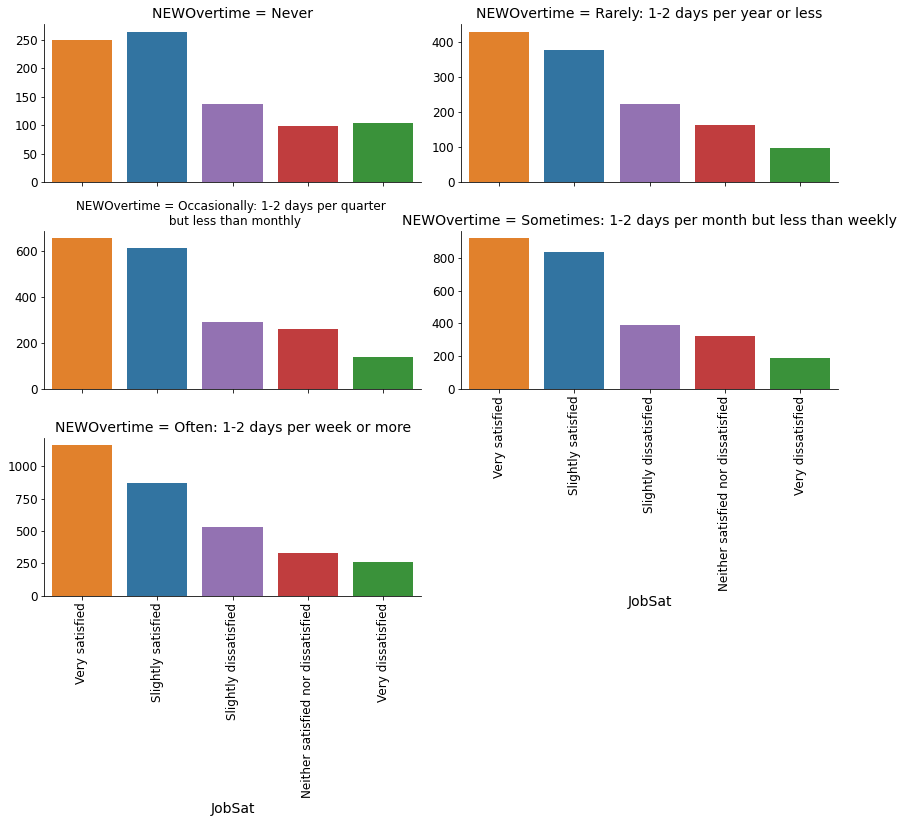

In [59]:
g = sns.FacetGrid(df_data,
                  col='NEWOvertime',
                  hue='JobSat',
                  col_wrap=2,
                  col_order=['Never',
                             'Rarely: 1-2 days per year or less',
                             'Occasionally: 1-2 days per quarter but less than monthly',
                             'Sometimes: 1-2 days per month but less than weekly',
                             'Often: 1-2 days per week or more'],
                  sharex=True, sharey=False, aspect=2)

g.map(sns.countplot, 'JobSat', order=['Very satisfied', 'Slightly satisfied', 
                                      'Slightly dissatisfied', 
                                      'Neither satisfied nor dissatisfied', 
                                      'Very dissatisfied'])

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

ax_tmp = g.axes.flat[2]
ax_tmp.set_title('NEWOvertime = Occasionally: 1-2 days per quarter \n but less than monthly')

In [60]:
df_data['JobSat'].value_counts().index

Index(['Very satisfied', 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very dissatisfied'],
      dtype='object')

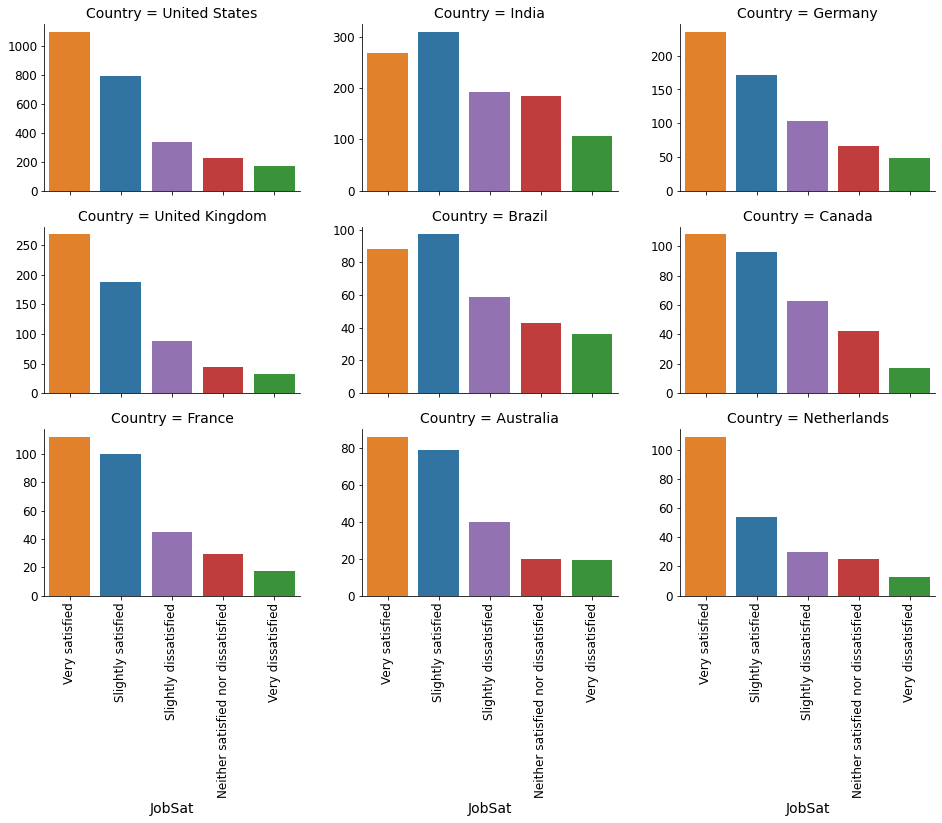

In [61]:
top_ten_countries = ['United States', 'India', 'Germany', 'United Kingdom', 'Brazil', 
                     'Canada', 'France', 'Australia', 'Netherlands']

g = sns.FacetGrid(df_data[df_data['Country'].isin(top_ten_countries)], 
                  col='Country', 
                  hue='JobSat',
                  col_wrap=3, col_order=top_ten_countries, aspect=1.5,
                  sharex=True, sharey=False)
g.map(sns.countplot, 'JobSat', order=['Very satisfied', 'Slightly satisfied', 
                                      'Slightly dissatisfied', 
                                      'Neither satisfied nor dissatisfied', 
                                      'Very dissatisfied'])

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [62]:
df_survey_2020 = pd.read_csv(os.path.join(root_dir, 'data/developer_survey_2020/survey_results_public.csv'))
df_survey_2020.shape

(88883, 85)

In [63]:
data_related_cond_2020 = df_survey_2020['DevType'].str.contains('data(?![a-z])', case=False, regex=True)

print(f"Participants who are data-related roles: {data_related_cond_2020.sum()}")

Participants who are data-related roles: 13808


In [64]:
# focus on the actitely employed participants only
valid_employed = ['Employed full-time', 'Employed part-time',
                  'Independent contractor, freelancer, or self-employed']

valid_employed_cond_2020 = df_survey_2020['Employment'].isin(valid_employed)
print(f"Participants who are currently actively employed: {sum(valid_employed_cond_2020)}")

Participants who are currently actively employed: 77420


In [65]:
sum(data_related_cond_2020 & valid_employed_cond_2020)/sum(valid_employed_cond_2020)

0.16711444071299406

In [66]:
# focus on currently actively employed only
print(f"Total number of responders who are actively employed: {sum(valid_employed_cond_2020)}\n"
      f"Percentage of responders who process a data-related role: "
      f"{sum(valid_employed_cond_2020 & data_related_cond_2020) / sum(valid_employed_cond_2020)*100: 5.2f}%")

Total number of responders who are actively employed: 77420
Percentage of responders who process a data-related role:  16.71%


In [67]:
df_data_2020 = extract_data_related(df_survey_2020)

In [68]:
df_data_2020.shape

(17370, 89)

In [69]:
df_data.shape

(11186, 67)

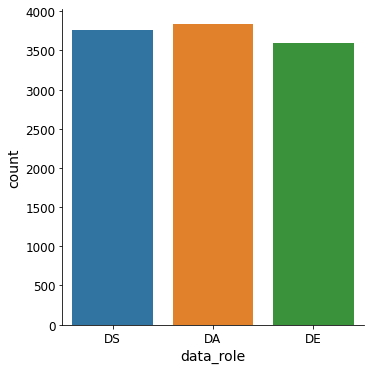

In [70]:
sns.catplot(x="data_role", kind='count', data=df_data)

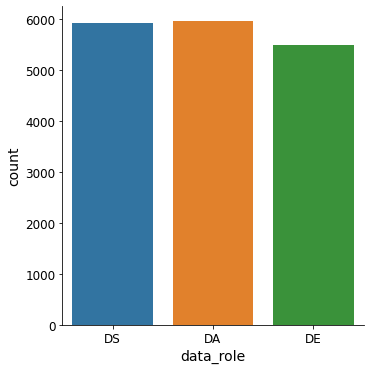

In [71]:
sns.catplot(x="data_role", kind='count', data=df_data_2020)

In [72]:
trend_role_count = df_data_2020['data_role'].value_counts().to_frame().rename(columns={'data_role': 2020}).\
join(df_data['data_role'].value_counts().to_frame().rename(columns={'data_role': 2021})).T

trend_role_count

,DA,DS,DE
2020,5952,5922,5496
2021,3832,3761,3593


Text(0.5, 1.0, 'Numbers of Data Roles v.s. Year')

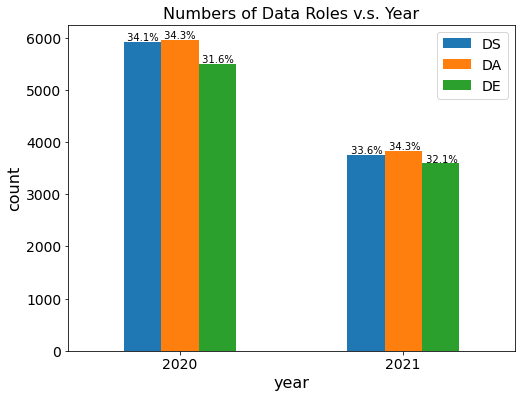

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
trend_role_count[['DS', 'DA', 'DE']].plot.bar(ax=ax, rot=0)

values = [0.340933, 0.336224,
          0.342660, 0.342571,
          0.316408, 0.321205]
for p, v in zip(ax.patches, values):
    ax.annotate(f"{v*100: 4.1f}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax.tick_params(labelsize=14)
ax.set_xlabel('year', fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_title('Numbers of Data Roles v.s. Year', fontsize=16)

In [74]:
trend_role_percent = trend_role_count.copy()

In [75]:
trend_role_percent["total"] = trend_role_percent.sum(axis=1)

In [76]:
trend_role_percent.apply(lambda x: x/x['total'], axis=1)[['DS', 'DA', 'DE']]

,DS,DA,DE
2020,0.340933,0.342660,0.316408
2021,0.336224,0.342571,0.321205


In [77]:
pd.pivot_table(df_data, values='ConvertedComp', index='data_role')

,ConvertedComp
data_role,
DA,117228.031972
DE,125454.218274
DS,123911.183276


In [78]:
trend_salary = pd.pivot_table(df_data_2020, values='ConvertedComp', index='data_role').rename(columns={'ConvertedComp': '2020'}).\
 join(pd.pivot_table(df_data, values='ConvertedComp', index='data_role').rename(columns={'ConvertedComp': '2021'})).T

trend_salary

data_role,DA,DE,DS
2020,135532.920573,141837.794395,142191.269860
2021,117228.031972,125454.218274,123911.183276


Text(0.5, 1.0, 'Annual salary v.s. Year')

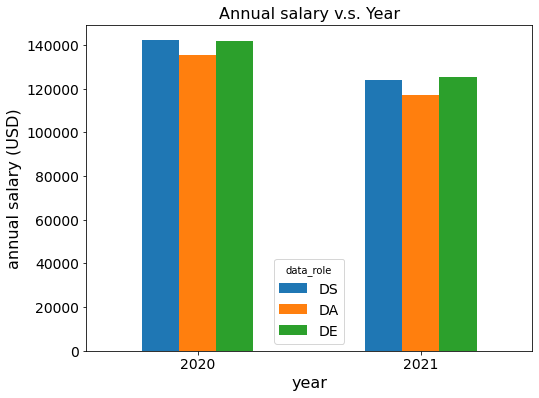

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
trend_salary[['DS', 'DA', 'DE']].plot.bar(ax=ax, rot=0)

ax.tick_params(labelsize=14)
ax.set_xlabel('year', fontsize=16)
ax.set_ylabel('annual salary (USD)', fontsize=16)
ax.set_title('Annual salary v.s. Year', fontsize=16)

In [80]:
df_data['JobSat'].value_counts()

Very satisfied                        3582
Slightly satisfied                    3079
Slightly dissatisfied                 1623
Neither satisfied nor dissatisfied    1242
Very dissatisfied                      846
Name: JobSat, dtype: int64

In [81]:
satisfaction_map = {'Very satisfied': 2, 
                    'Slightly satisfied': 1, 
                    'Neither satisfied nor dissatisfied': 0, 
                    'Slightly dissatisfied': -1, 
                    'Very dissatisfied': -2}

In [82]:
df_data['JobSat_Score'] = df_data['JobSat'].map(satisfaction_map)
df_data_2020['JobSat_Score'] = df_data_2020['JobSat'].map(satisfaction_map)

In [83]:
print(df_data_2020['JobSat_Score'].mean(), df_data['JobSat_Score'].mean())

0.7155378988523143 0.6679521789433089


In [84]:
trend_satisfaction = pd.pivot_table(df_data_2020, values='JobSat_Score', index='data_role').rename(columns={'JobSat_Score': '2020'}).\
 join(pd.pivot_table(df_data, values='JobSat_Score', index='data_role').rename(columns={'JobSat_Score': '2021'})).T

trend_satisfaction

data_role,DA,DE,DS
2020,0.653209,0.724442,0.769388
2021,0.602344,0.671091,0.730769


Text(0.5, 1.0, 'Satisfaction v.s. Year')

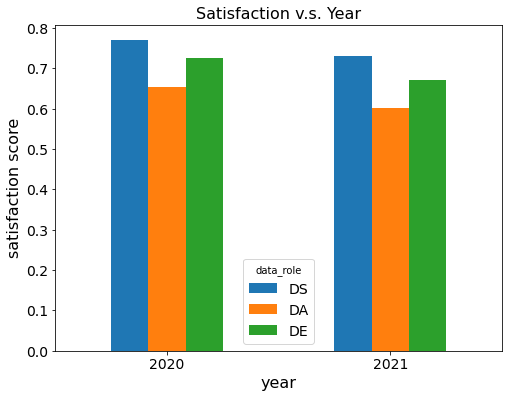

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
trend_satisfaction[['DS', 'DA', 'DE']].plot.bar(ax=ax, rot=0)

ax.tick_params(labelsize=14)
ax.set_xlabel('year', fontsize=16)
ax.set_ylabel('satisfaction score', fontsize=16)
ax.set_title('Satisfaction v.s. Year', fontsize=16)